In [1]:
import seaborn
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MultipleLocator
import seaborn
import cmocean
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns


# directory to save figures
figdir = "/home/rfrost/manuscript_plots/"
# absolute path to directory with probability density function data
pdf_dir = "/home/rfrost/simulations/nc/"
# simulation to analyze
sims = ["full_step_6", "full_step_9", "full_step_12", "full_step_15"]
# height in meters to be plot
height = 6
# start and end timesteps
t0 = 576000
t1 = 1152000
# start and end in hours
t0hr = t0 * 0.05 / 3600
t1hr = t1 * 0.05 / 3600
# spacing of output
dt = 1000

# full path to pdf file
pdf_dir = f"{pdf_dir}{t0}_{t1}_vort_pdf_plot_params_{height}m.nc"
# lists to store stats, roll factor, and length scales
s_all, vort_all, vort_ac_all, vort_ls_all = [], [], [], []
# loop over sims
for sim in sims:
    dnc = f"/home/rfrost/simulations/nc/{sim}/"
    # volumetric stats
    s = xr.open_dataset(f"{dnc}{t0}_{t1}_stats.nc")
    s["time"] = s.time / 3600 + t0hr
    s_all.append(s)
    # vorticity stats
    vort = xr.open_dataset(f"{dnc}{t0}_{t1}_vort.nc")
    vort["time"] = vort.time / 3600 + t0hr
    vort_all.append(vort)
    # vorticity autocorrelation
    vort_ac = xr.open_dataset(f"{dnc}{t0}_{t1}_vort_autocorr.nc")
    vort_ac["time"] = vort_ac.time / 3600 + t0hr
    vort_ac_all.append(vort_ac)
    # vorticity length scales
    vort_ls = xr.open_dataset(f"{dnc}{t0}_{t1}_vort_ls.nc")
    vort_ls["time"] = vort_ls.time / 3600 + t0hr
    vort_ls_all.append(vort_ls)


# Plotting set up
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['text.latex.preamble'] = r'\usepackage{bm}'
rc('font', family='sans-serif')
rc('font', weight='normal', size=20)
rc('figure', facecolor='white')
ug_list = ["6", "9", "12", "15"]
time_colors = ["black", "red", "red", "blue", "blue"]
ug_colors = seaborn.color_palette("flare", 4)
linestyle = ["solid","solid","--","solid","--"]

In [6]:
for i, v in enumerate(vort_all):
    v["abs_omega_mean"] = (v.omega_x_abs_mean ** 2 + v.omega_y_abs_mean ** 2 + v.omega_z_abs_mean ** 2) ** (1/2)
    v["abs_horiz_omega_mean"] = (v.omega_x_abs_mean ** 2 + v.omega_y_abs_mean ** 2) ** (1/2)

### $\langle \zeta^+ \rangle$, $\langle |\omega_h| \rangle$, $\langle |\omega| \rangle$, $\langle \zeta^+ \rangle / \langle |\omega| \rangle$ at $z$ = 6.25 m

Text(13.15, 0.65, '$t_1$')

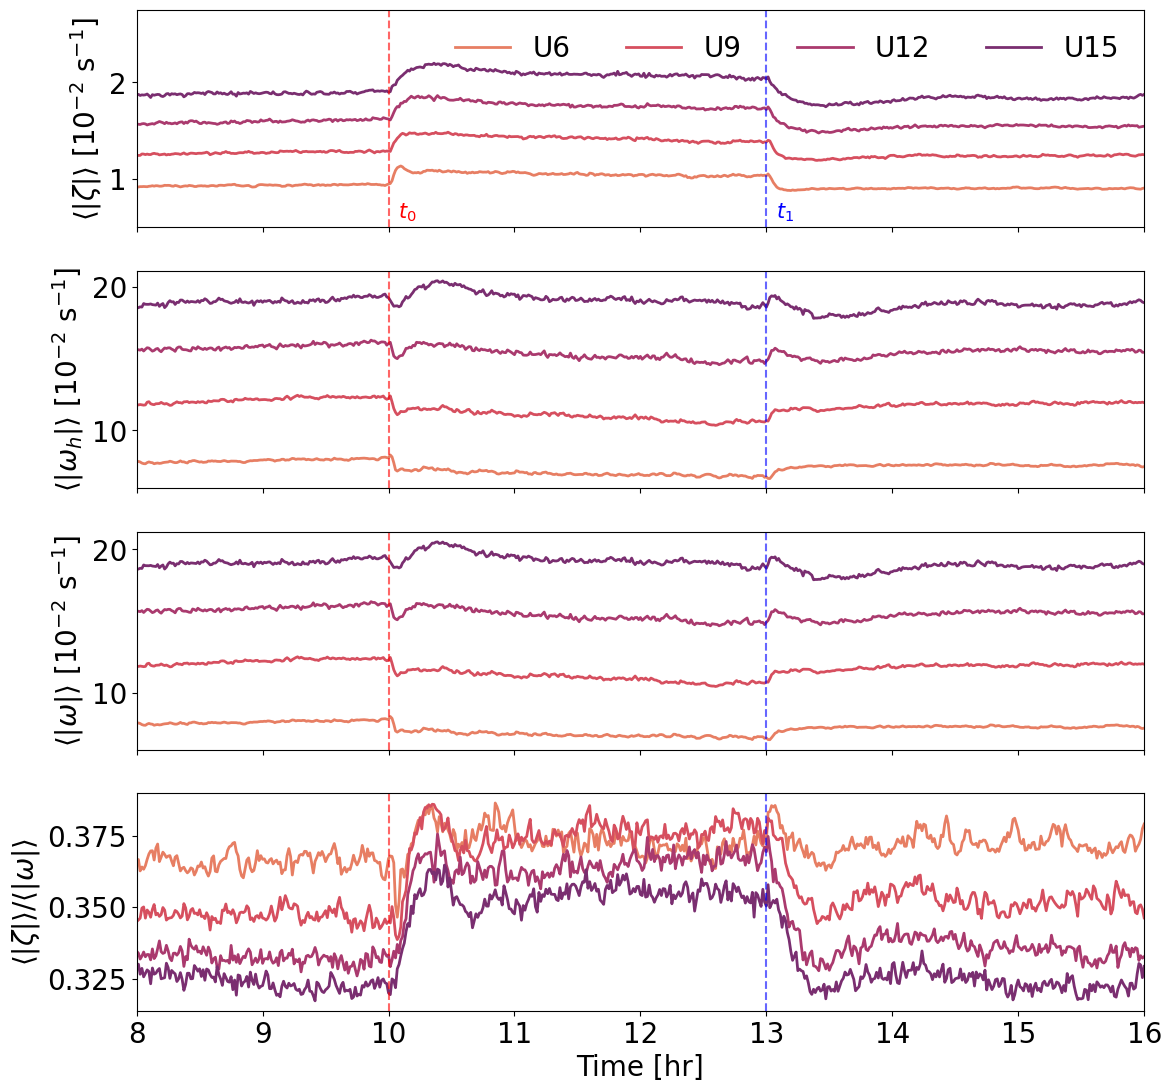

In [9]:
lab = ["U6", "U9", "U12", "U15"]

hidx = 0

fig, ax = plt.subplots(nrows=4, figsize=(13,13), sharex=True)

for i, v in enumerate(vort_all):
    ax[0].plot(v.time, v.omega_z_abs_mean[:,hidx] * 10 ** 2, 
            label=lab[i], c=ug_colors[i], lw=2)
    ax[1].plot(v.time, v.abs_horiz_omega_mean[:,hidx] * 10 ** 2, c=ug_colors[i], lw=2)
    ax[2].plot(v.time, v.abs_omega_mean[:,hidx] * 10 ** 2, c=ug_colors[i], lw=2)
    ax[3].plot(v.time, v.omega_z_abs_mean[:,hidx] / v.abs_omega_mean[:,4], c=ug_colors[i], lw=2)

ax[0].set_ylabel("$\\langle |\zeta| \\rangle$ [10$^{-2}$ s$^{-1}$]")
ax[1].set_ylabel("$\\langle |\omega_h| \\rangle$ [10$^{-2}$ s$^{-1}$]")
ax[2].set_ylabel("$\\langle |\omega| \\rangle$ [10$^{-2}$ s$^{-1}$]")
ax[3].set_ylabel("$\\langle |\zeta| \\rangle / \\langle |\omega| \\rangle$")
ax[3].set_xlabel("Time [hr]")

ax[0].set_ylim(0.5,2.75)
# ax[1].set_ylim(5,30)
# ax[2].set_ylim(3,11)
# ax[3].set_ylim(0.195,0.24)
ax[3].set_xlim(8,16)

# ax[0].yaxis.set_major_locator(MultipleLocator(0.5))
# ax[0].yaxis.set_minor_locator(MultipleLocator(0.1))
# ax[1].yaxis.set_major_locator(MultipleLocator(10))
# ax[1].yaxis.set_minor_locator(MultipleLocator(1))
# ax[2].yaxis.set_major_locator(MultipleLocator(10))
# ax[2].yaxis.set_minor_locator(MultipleLocator(1))
# ax[3].yaxis.set_major_locator(MultipleLocator(0.02))
# ax[3].yaxis.set_minor_locator(MultipleLocator(0.01))
# ax[3].xaxis.set_major_locator(MultipleLocator(2))
# ax[3].xaxis.set_minor_locator(MultipleLocator(1))

ax[0].legend(frameon=False, ncols=4, loc="upper right")

for iax in ax:
    # vertical lines
    iax.axvline(x=10, c="red", lw=1.5, alpha=0.6, ls="--")
    iax.axvline(x=13, c="blue", lw=1.5, alpha=0.6, ls="--")

# text above lines
ax[0].text(10.15, 0.65, f"$t_0$", ha="center", va="center", c="red", fontsize=15)
ax[0].text(13.15, 0.65, f"$t_1$", ha="center", va="center", c="blue", fontsize=15)

### Figure for BAMS article. Surface heat flux (top), vertical vorticity (middle), and horizontal vorticity (bottom)

In [20]:
time = np.linspace(8,16,576000)
flux = np.empty(len(time))
for i in range(0,144000):
    flux[i] = 0.05
for i in range(144000,360000):
    flux[i] = 0.30
for i in range(360000,576000):
    flux[i] = 0.05

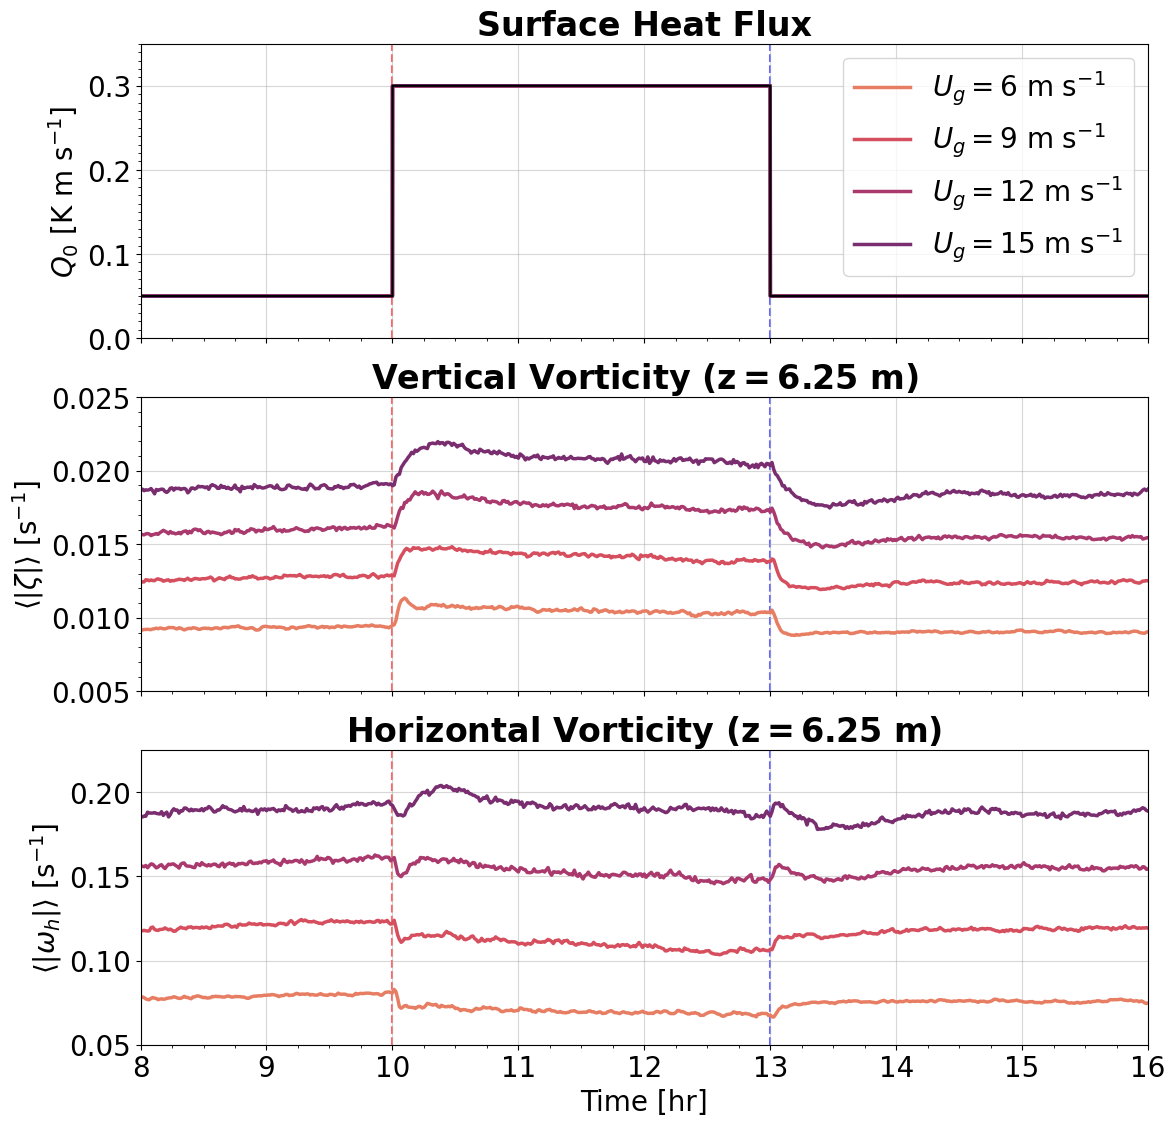

In [67]:
lab = ["$U_g = 6$ m s$^{-1}$", "$U_g = 9$ m s$^{-1}$", "$U_g = 12$ m s$^{-1}$", "$U_g = 15$ m s$^{-1}$"]

fig, ax = plt.subplots(nrows=3, figsize=(13,13), sharex=True)

for i, v in enumerate(vort_all):
    ax[0].plot(time, flux, lw=2.5, label=lab[i], c=ug_colors[i])
    ax[1].plot(v.time, v.omega_z_abs_mean[:,hidx], label=lab[i], c=ug_colors[i], lw=2.5)
    ax[2].plot(v.time, v.abs_horiz_omega_mean[:,hidx], c=ug_colors[i], lw=2.5)
ax[0].plot(time, flux, c='black')

ax[0].set_ylabel("$Q_0$ [K m s$^{-1}$]")
ax[0].set_title("Surface Heat Flux")
ax[0].set_ylim(0,0.35)
ax[0].yaxis.set_major_locator(MultipleLocator(0.1))
ax[0].yaxis.set_minor_locator(MultipleLocator(0.01))
ax[0].legend(labels=lab, frameon=True, loc="upper right")
ax[1].set_ylabel("$\\langle |\zeta| \\rangle$ [s$^{-1}$]")
ax[1].set_title("Vertical Vorticity ($\\bf{z = 6.25}$ m)")
ax[1].set_ylim(0.005,0.025)
ax[1].yaxis.set_major_locator(MultipleLocator(0.005))
ax[1].yaxis.set_minor_locator(MultipleLocator(0.001))
ax[2].set_ylabel("$\\langle |\omega_h| \\rangle$ [s$^{-1}$]")
ax[2].set_title("Horizontal Vorticity ($\\bf{z = 6.25}$ m)")
ax[2].set_ylim(0.05,0.225)
ax[2].set_xlabel("Time [hr]")
ax[2].xaxis.set_minor_locator(MultipleLocator(0.25))

for iax in ax:
    iax.axvline(x=10, c="red", lw=1.5, alpha=0.6, ls="--", zorder=1)
    iax.axvline(x=13, c="blue", lw=1.5, alpha=0.6, ls="--", zorder=1)
    iax.set_xlim(8,16)
    iax.grid(alpha=0.5)

(6.0, 100.0)

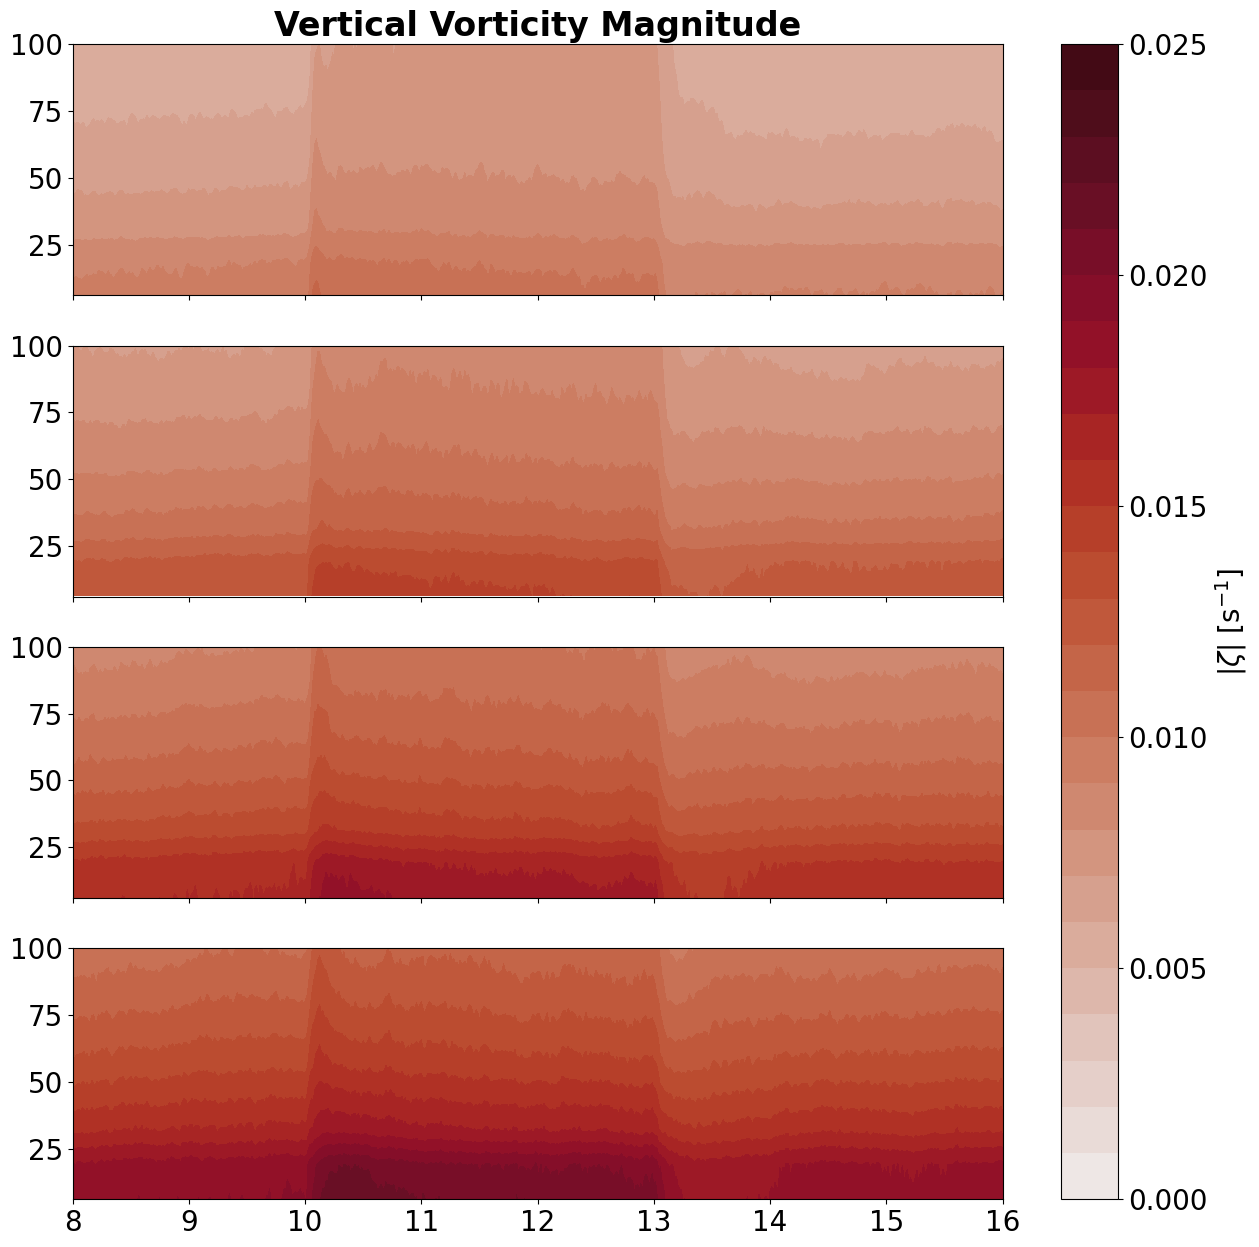

In [4]:
clevs = np.arange(0,0.0251,0.001)

fig, ax = plt.subplots(figsize=(15,15), nrows=4, sharey=True, sharex=True)

for i in range(4):
    contour = ax[i].contourf(vort_all[i].time, vort_all[i].z, vort_all[i].zeta3_abs_mean.T, 
                            clevs, cmap=cmocean.cm.amp)

# Add the colorbar next to the plot
cbar = fig.colorbar(contour, ax=ax, orientation='vertical')
cbar.set_ticks(np.arange(0,0.0251,0.005))
cbar.set_label("$|\zeta|$ [s$^{-1}$]")

ax[0].set_title("Vertical Vorticity Magnitude")
ax[0].set_ylim(6,100)

Text(13.15, 42.75, '$t_1$')

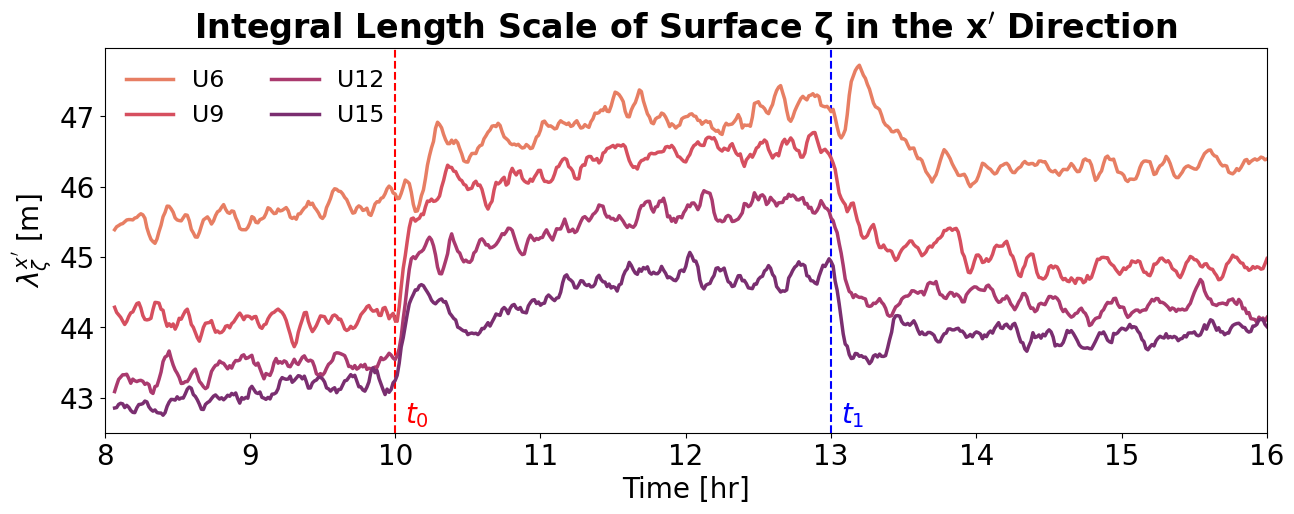

In [5]:
fig, ax = plt.subplots(figsize=(15,5), nrows=1)

cases = ["U6", "U9", "U12", "U15"]

for i, v in enumerate(vort_ls_all):
    time = v.time
    ls = v.ls_zeta3_rolls[:,0].rolling(time=6).mean()
    ax.plot(time, ls, c=ug_colors[i], label=cases[i], lw=2.5)

ax.legend(frameon=False, ncols=2, loc="upper left", fontsize=17)
ax.set_ylabel("$\lambda_{\zeta}^{x'}$ [m]")
ax.set_xlim(8,16)
ax.set_xlabel("Time [hr]")
ax.set_title("Integral Length Scale of Surface $\\bf{\zeta}$ in the $\\bf{x'}$ Direction")

ax.axvline(x=10, c="red", lw=1.5, ls="--", zorder=0)
ax.axvline(x=13, c="blue", lw=1.5, ls="--", zorder=0)
ax.text(10.15, 42.75, f"$t_0$", ha="center", va="center", c="red", fontsize=20)
ax.text(13.15, 42.75, f"$t_1$", ha="center", va="center", c="blue", fontsize=20)

Text(0.0, 1.0, "Integral Length Scale of Surface $\\bf{\\omega}_{y'}$ in the $\\bf{x'}$ Direction")

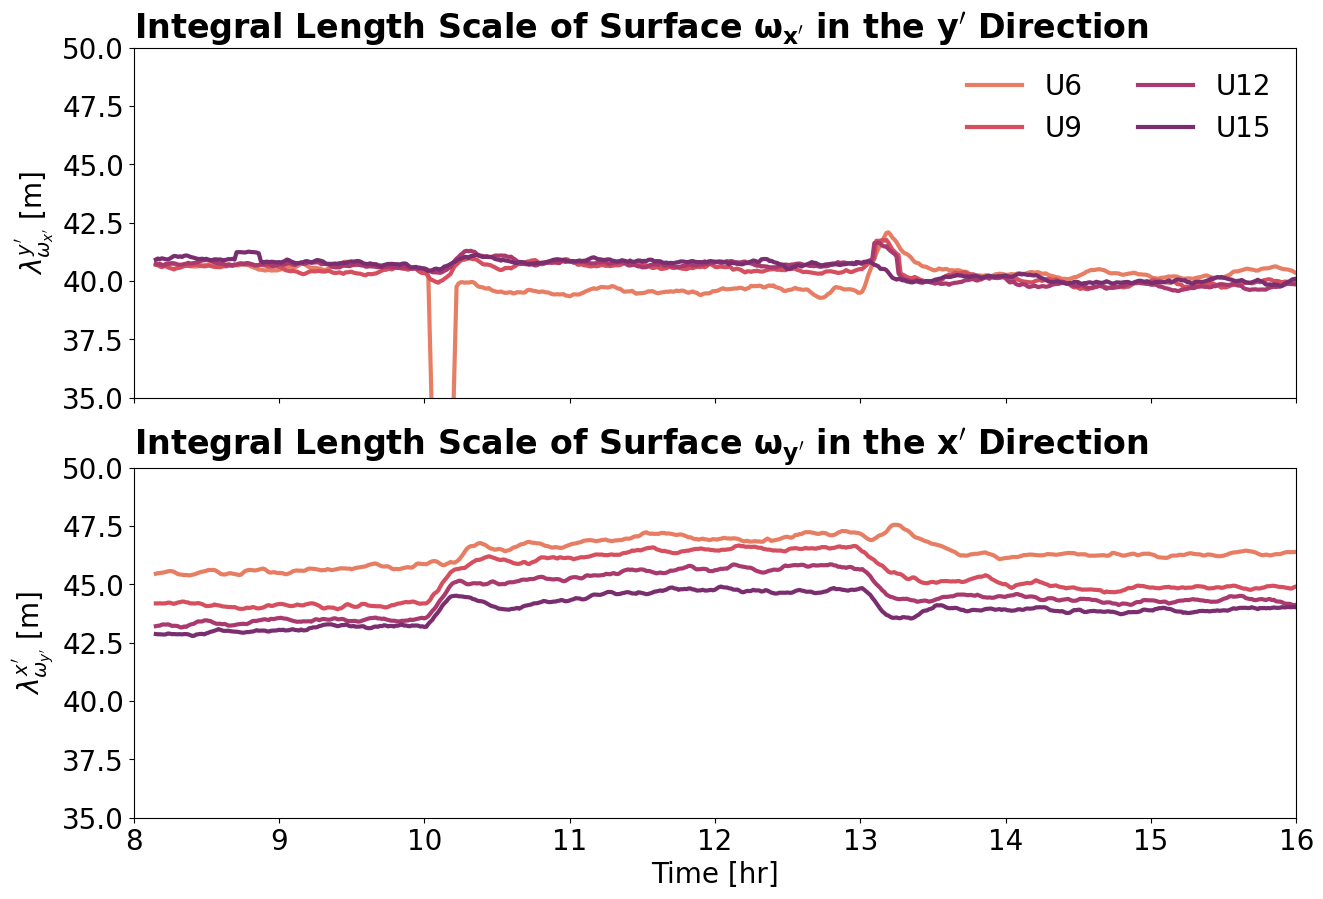

In [7]:
fig, ax = plt.subplots(figsize=(15,10), nrows=2, sharey=True, sharex=True)

cases = ["U6", "U9", "U12", "U15"]

for i, v in enumerate(vort_ls_all):
    ls = v.ls_zeta1_normal[:,0].rolling(time=12).mean()
    ax[0].plot(time, ls, c=ug_colors[i], label=cases[i], lw=3)

    time = v.time
    ls = v.ls_zeta2_rolls[:,0].rolling(time=12).mean()
    ax[1].plot(time, ls, c=ug_colors[i], label=cases[i], lw=3)

ax[0].legend(frameon=False, ncols=2)
ax[0].set_ylabel("$\lambda_{\omega_{x'}}^{y'}$ [m]")
ax[1].set_ylabel("$\lambda_{\omega_{y'}}^{x'}$ [m]")
ax[0].set_xlim(8,16)
ax[0].set_ylim(35,50)
ax[1].set_xlabel("Time [hr]")
ax[0].set_title("Integral Length Scale of Surface $\\bf{\omega}_{x'}$ in the $\\bf{y'}$ Direction", loc="left")
ax[1].set_title("Integral Length Scale of Surface $\\bf{\omega}_{y'}$ in the $\\bf{x'}$ Direction", loc="left")